# Import Required Libraries
Import the necessary libraries, including pandas, numpy, matplotlib, and seaborn.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Load and Inspect Data
Load the dataset and inspect the first few rows to understand its structure.

In [3]:
# Load and Inspect Data

# Load the dataset
data = pd.read_csv('/Users/yujin/Desktop/대학원/Human-AI interaction and data science/HAI5016_Final Presentation/diabetes_prediction_dataset 2.csv')

# Inspect the first few rows of the dataset
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


# Data Preprocessing
Handle missing values, encode categorical variables, and normalize numerical features if necessary.

In [5]:
# Data Preprocessing

# Handle missing values
data = data.dropna()

# Encode categorical variables
data['gender'] = data['gender'].map({'Female': 0, 'Male': 1})

# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['bmi', 'HbA1c_level', 'blood_glucose_level']] = scaler.fit_transform(data[['bmi', 'HbA1c_level', 'blood_glucose_level']])

# Inspect the preprocessed data
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,NaN,80.0,0,1,never,-0.321051,1.001692,0.047709,0
1,NaN,54.0,0,0,No Info,-0.000114,1.001692,-1.426157,0
2,NaN,28.0,0,0,never,-0.000114,0.161089,0.489869,0
3,NaN,36.0,0,0,current,-0.583225,-0.492714,0.416175,0
4,NaN,76.0,1,1,current,-1.081957,-0.679515,0.416175,0


# Exploratory Data Analysis
Generate summary statistics and visualize the distribution of each feature.

       gender           age  hypertension  heart_disease           bmi  \
count     0.0  99982.000000  99982.000000   99982.000000  9.998200e+04   
mean      NaN     41.888076      0.074863       0.039427  2.938623e-17   
std       NaN     22.517206      0.263172       0.194610  1.000005e+00   
min       NaN      0.080000      0.000000       0.000000 -2.608291e+00   
25%       NaN     24.000000      0.000000       0.000000 -5.561032e-01   
50%       NaN     43.000000      0.000000       0.000000 -1.139908e-04   
75%       NaN     60.000000      0.000000       0.000000  3.404106e-01   
max       NaN     80.000000      1.000000       1.000000  1.030151e+01   

        HbA1c_level  blood_glucose_level      diabetes  
count  9.998200e+04         9.998200e+04  99982.000000  
mean   3.866048e-17         8.385914e-18      0.085015  
std    1.000005e+00         1.000005e+00      0.278906  
min   -1.893720e+00        -1.426157e+00      0.000000  
25%   -6.795148e-01        -9.348685e-01      0.

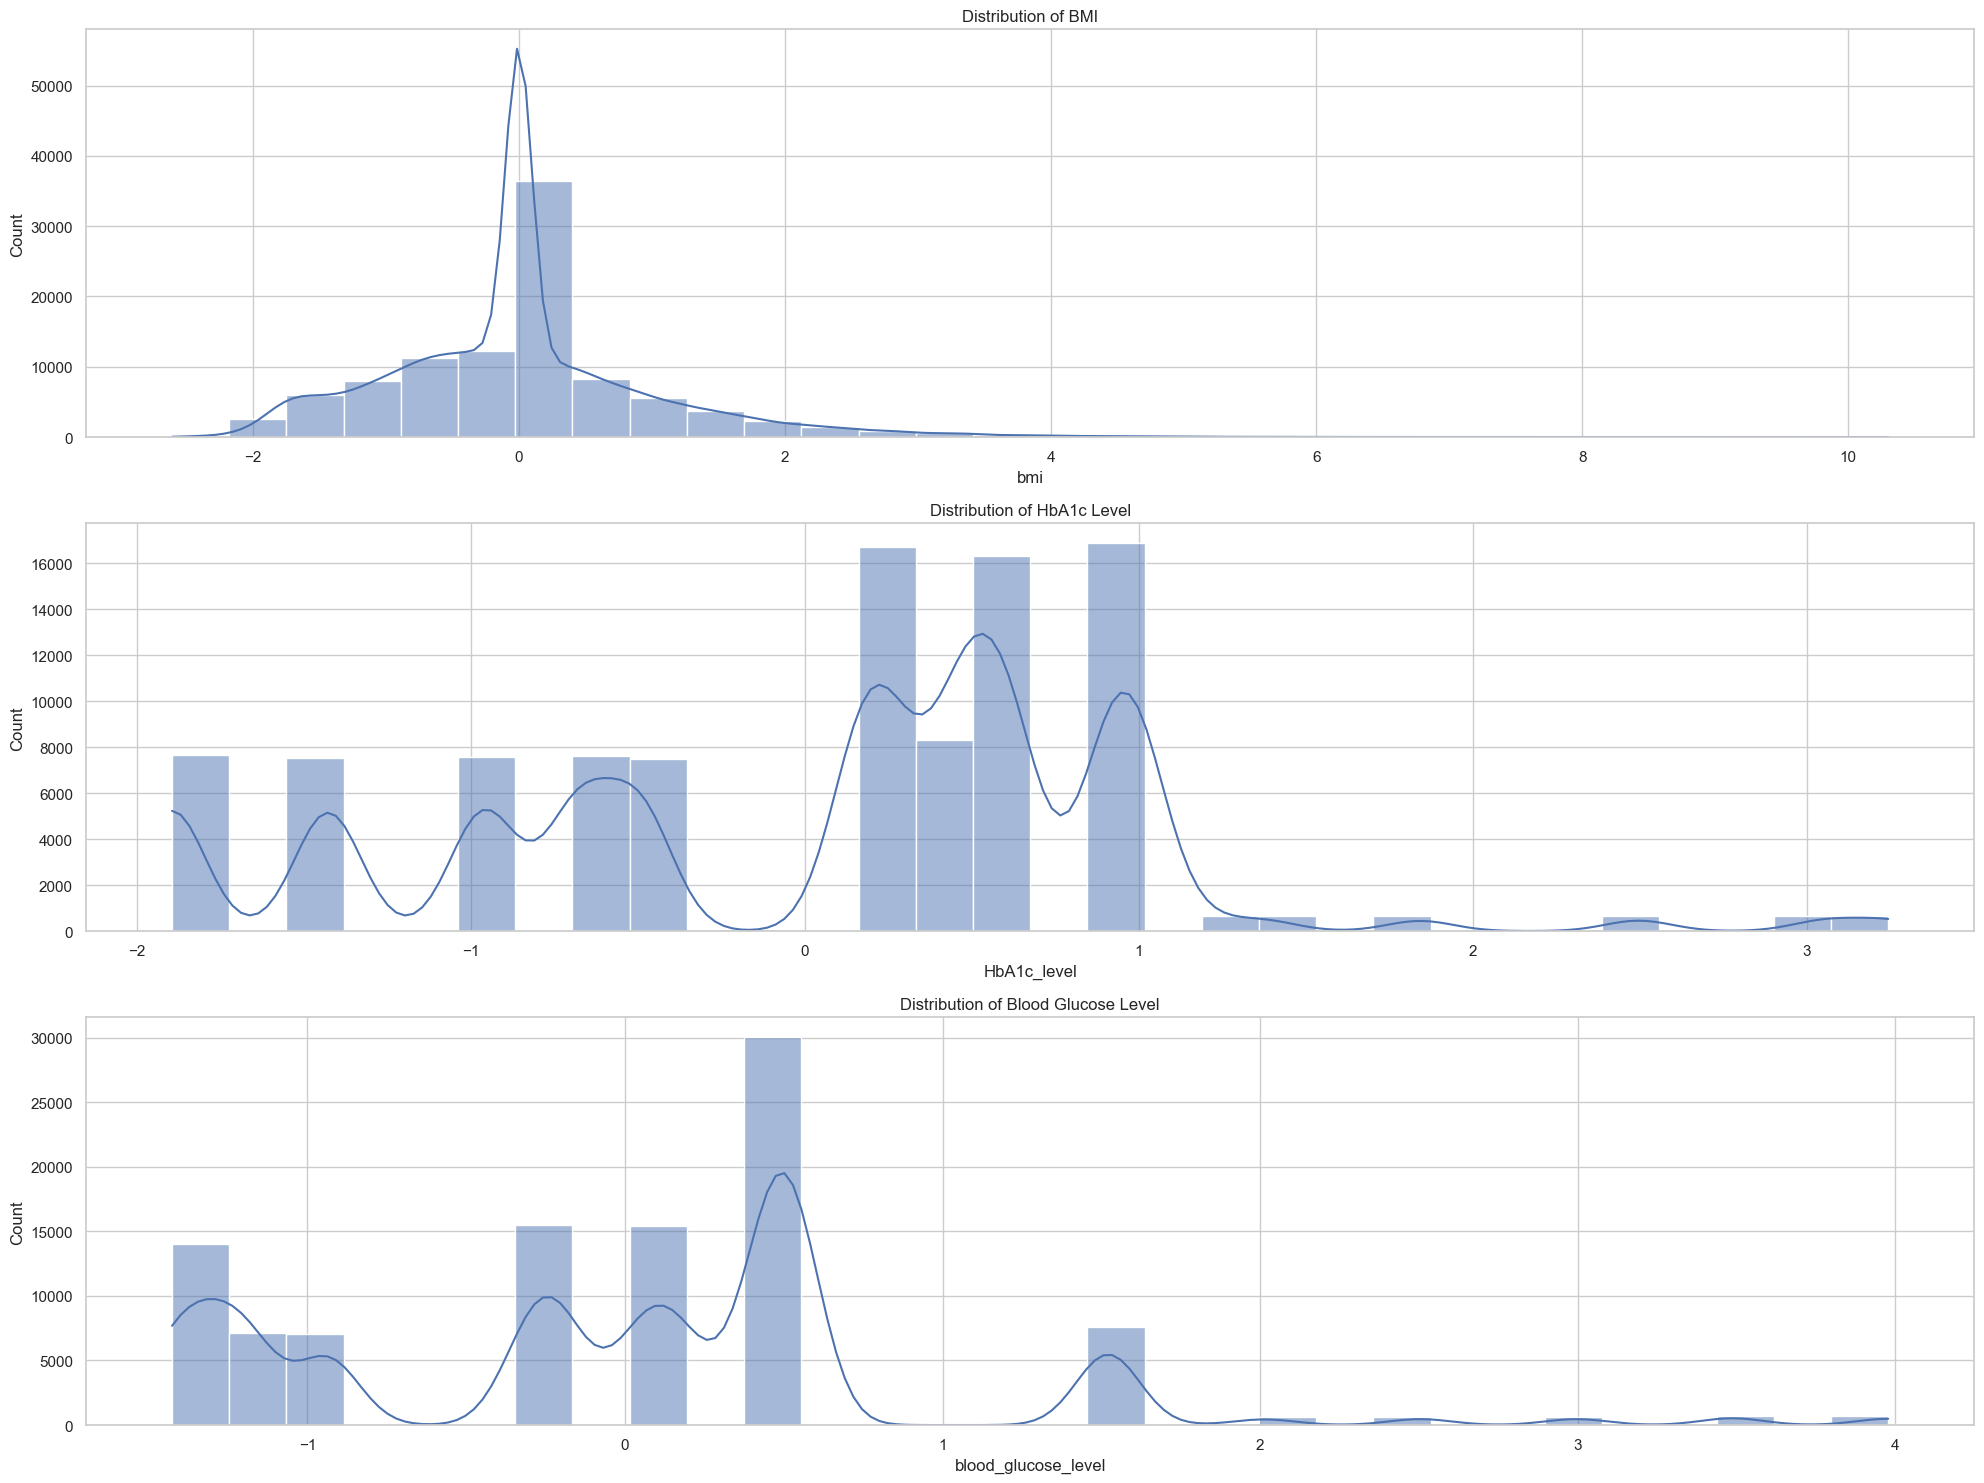

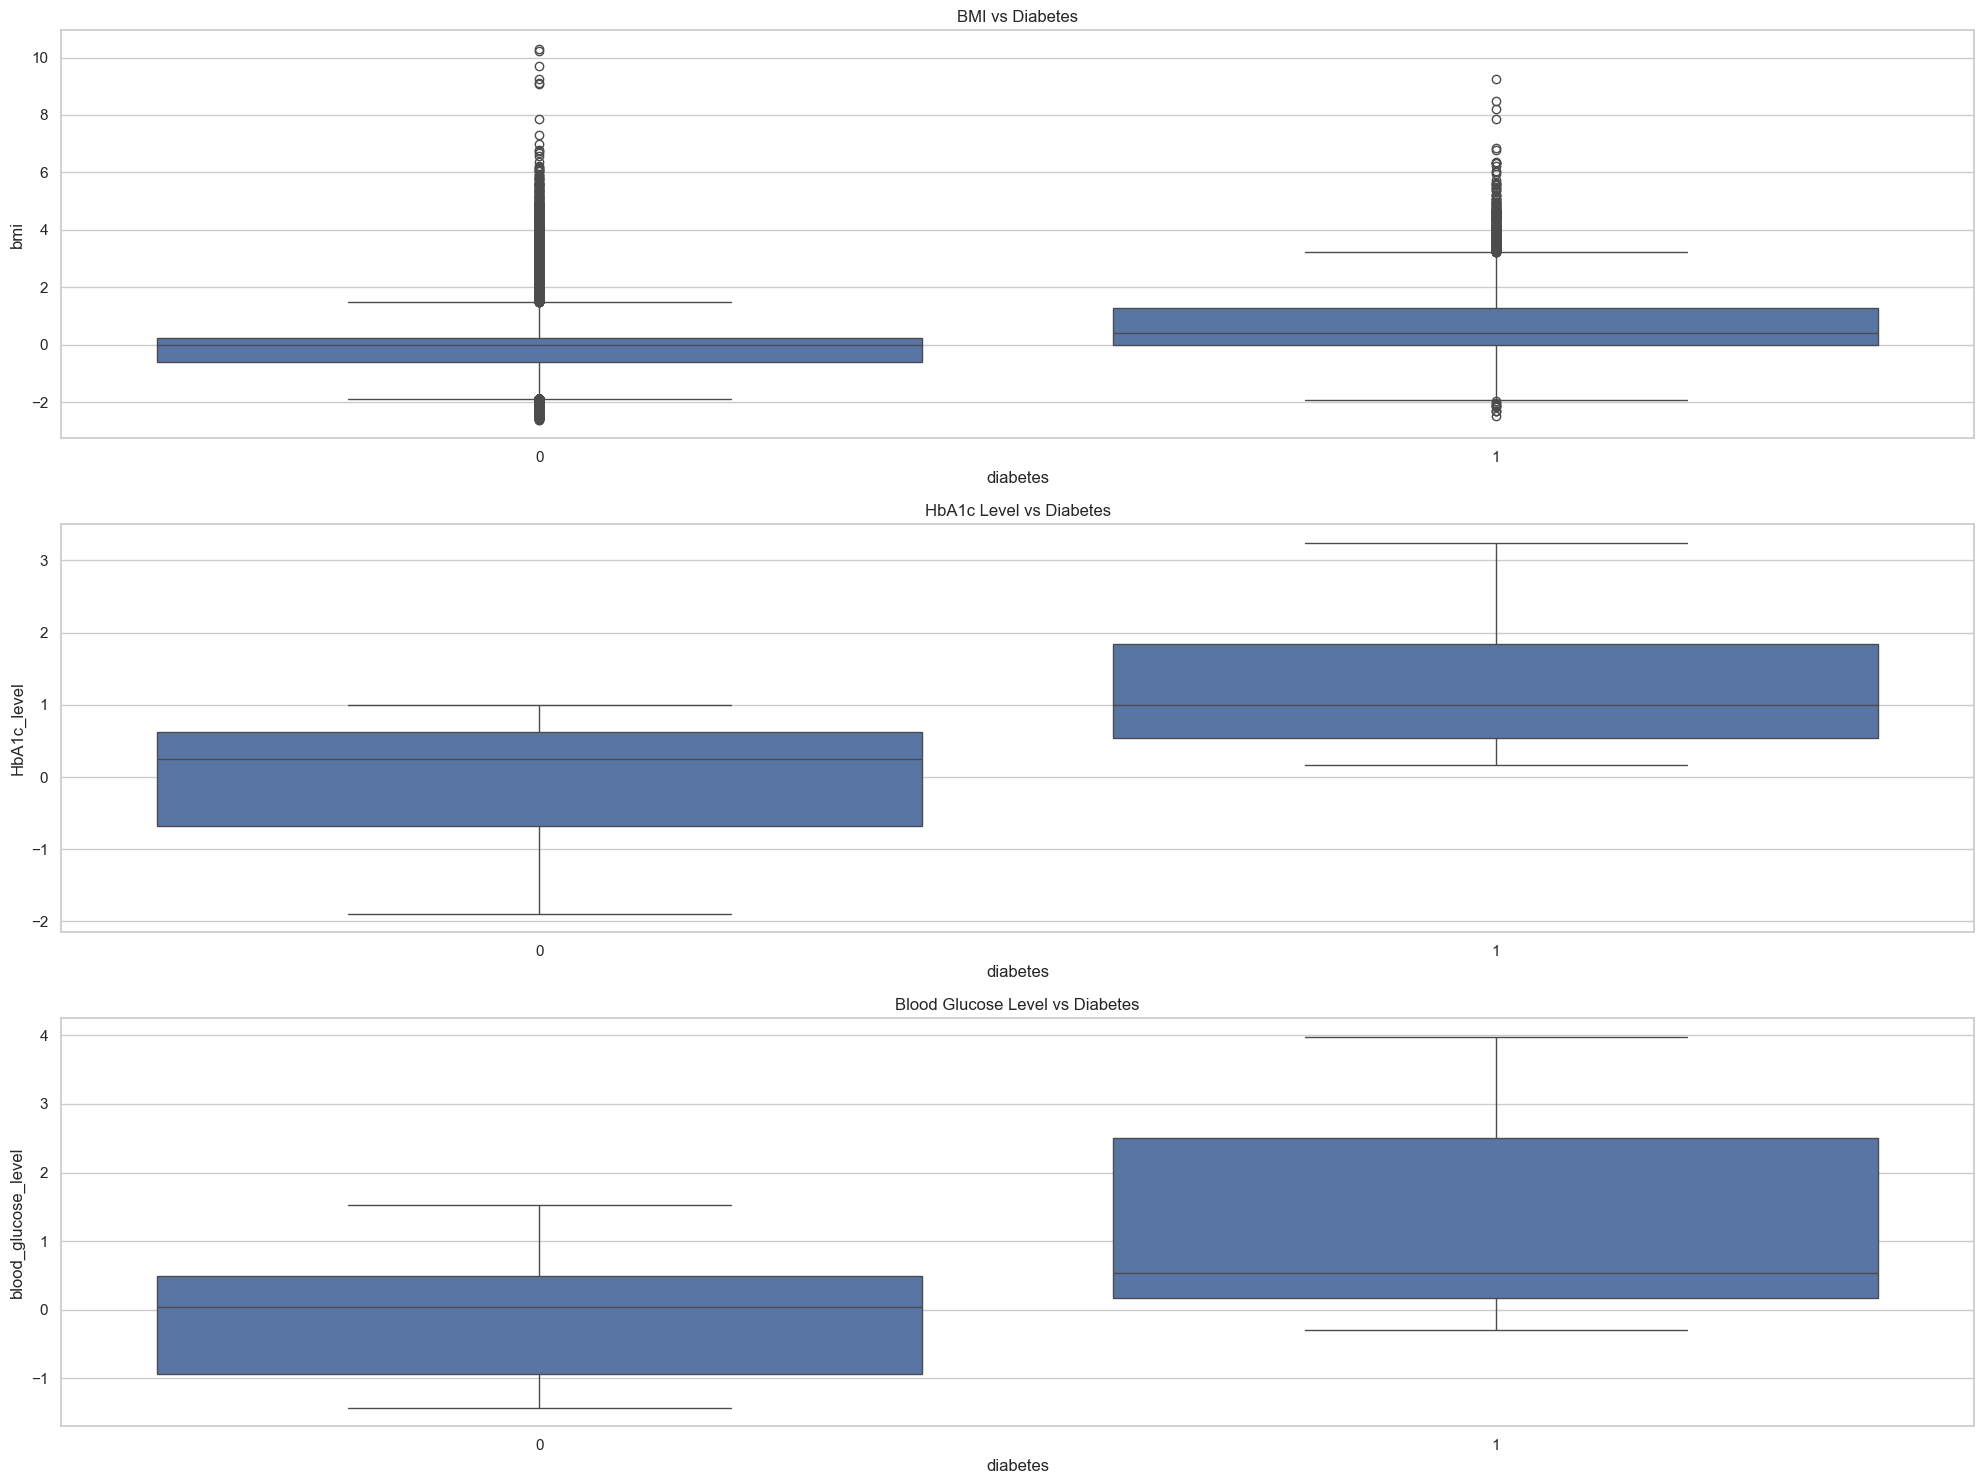

In [6]:
# Exploratory Data Analysis

# Generate summary statistics
summary_stats = data.describe()
print(summary_stats)

# Visualize the distribution of each feature
plt.figure(figsize=(20, 15))

# Distribution of BMI
plt.subplot(3, 1, 1)
sns.histplot(data['bmi'], kde=True, bins=30)
plt.title('Distribution of BMI')

# Distribution of HbA1c level
plt.subplot(3, 1, 2)
sns.histplot(data['HbA1c_level'], kde=True, bins=30)
plt.title('Distribution of HbA1c Level')

# Distribution of Blood Glucose Level
plt.subplot(3, 1, 3)
sns.histplot(data['blood_glucose_level'], kde=True, bins=30)
plt.title('Distribution of Blood Glucose Level')

plt.tight_layout()
plt.show()

# Visualize the relationship between features and diabetes
plt.figure(figsize=(20, 15))

# BMI vs Diabetes
plt.subplot(3, 1, 1)
sns.boxplot(x='diabetes', y='bmi', data=data)
plt.title('BMI vs Diabetes')

# HbA1c Level vs Diabetes
plt.subplot(3, 1, 2)
sns.boxplot(x='diabetes', y='HbA1c_level', data=data)
plt.title('HbA1c Level vs Diabetes')

# Blood Glucose Level vs Diabetes
plt.subplot(3, 1, 3)
sns.boxplot(x='diabetes', y='blood_glucose_level', data=data)
plt.title('Blood Glucose Level vs Diabetes')

plt.tight_layout()
plt.show()

# Hypothesis Testing: BMI vs Diabetes
Use scatter plots and regression analysis to test the relationship between BMI and diabetes.

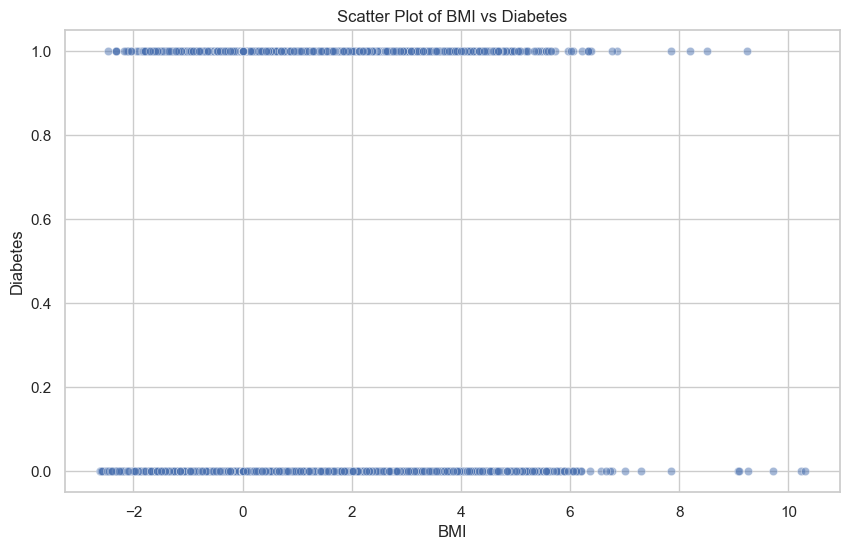

Optimization terminated successfully.
         Current function value: 0.271329
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                99982
Model:                          Logit   Df Residuals:                    99980
Method:                           MLE   Df Model:                            1
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                 0.06712
Time:                        07:03:50   Log-Likelihood:                -27128.
converged:                       True   LL-Null:                       -29080.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5447      0.013   -199.515      0.000      -2.570      -2.520
bmi            0.6246      0.

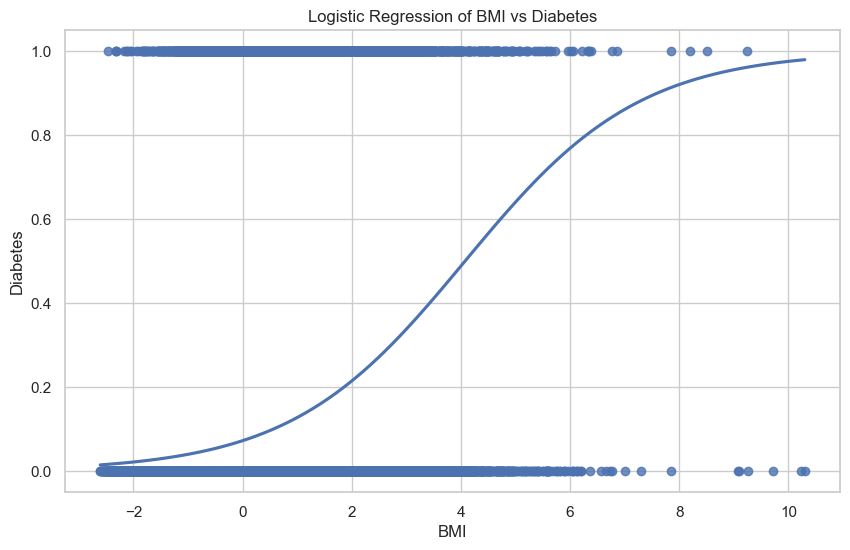

In [7]:
# Hypothesis Testing: BMI vs Diabetes

# Scatter plot to visualize the relationship between BMI and diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='diabetes', data=data, alpha=0.5)
plt.title('Scatter Plot of BMI vs Diabetes')
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.show()

# Regression analysis to test the relationship between BMI and diabetes
import statsmodels.api as sm

# Define the independent variable (BMI) and dependent variable (diabetes)
X = data['bmi']
y = data['diabetes']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the regression analysis
print(result.summary())

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='bmi', y='diabetes', data=data, logistic=True, ci=None)
plt.title('Logistic Regression of BMI vs Diabetes')
plt.xlabel('BMI')
plt.ylabel('Diabetes')
plt.show()

# Hypothesis Testing: HbA1c Level vs Diabetes
Use scatter plots and regression analysis to test the relationship between HbA1c level and diabetes.

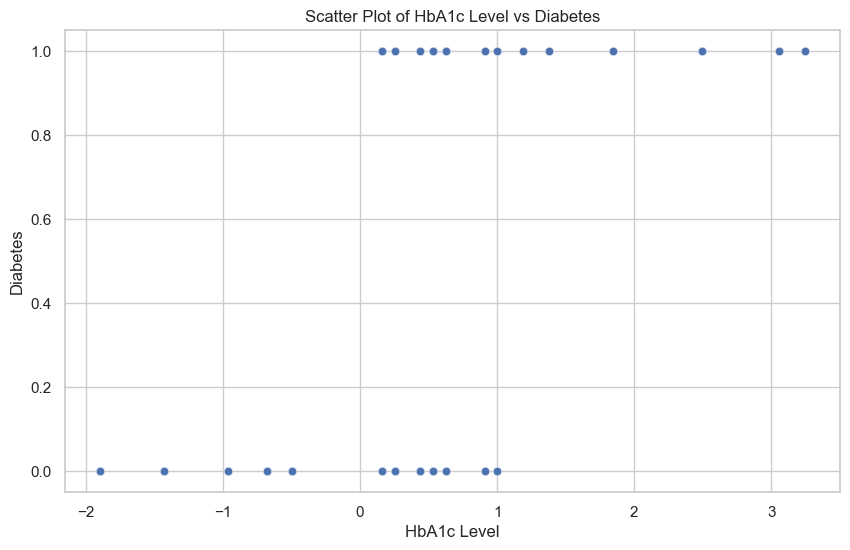

Optimization terminated successfully.
         Current function value: 0.192006
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                99982
Model:                          Logit   Df Residuals:                    99980
Method:                           MLE   Df Model:                            1
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.3398
Time:                        07:04:17   Log-Likelihood:                -19197.
converged:                       True   LL-Null:                       -29080.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.9140      0.028   -138.737      0.000      -3.969      -3.859
HbA1c_level     2.5777    

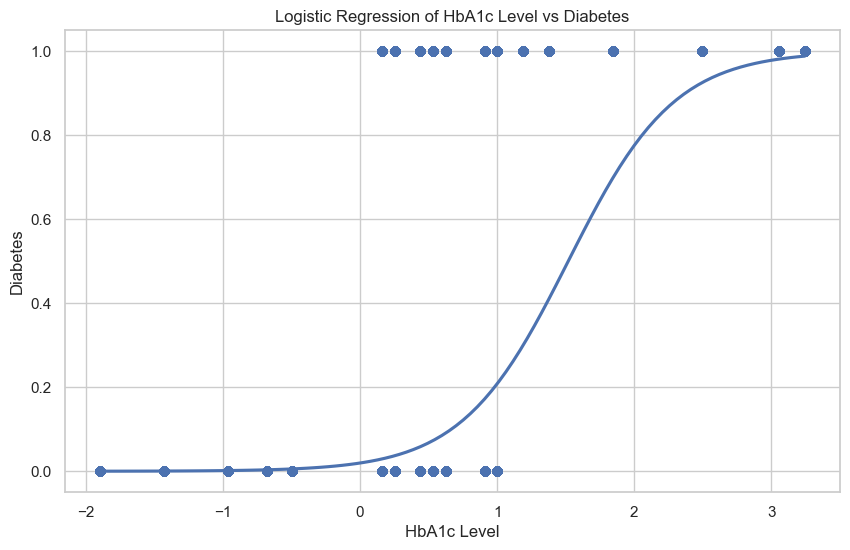

In [8]:
# Hypothesis Testing: HbA1c Level vs Diabetes

# Scatter plot to visualize the relationship between HbA1c level and diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='HbA1c_level', y='diabetes', data=data, alpha=0.5)
plt.title('Scatter Plot of HbA1c Level vs Diabetes')
plt.xlabel('HbA1c Level')
plt.ylabel('Diabetes')
plt.show()

# Regression analysis to test the relationship between HbA1c level and diabetes
# Define the independent variable (HbA1c level) and dependent variable (diabetes)
X = data['HbA1c_level']
y = data['diabetes']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the regression analysis
print(result.summary())

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='HbA1c_level', y='diabetes', data=data, logistic=True, ci=None)
plt.title('Logistic Regression of HbA1c Level vs Diabetes')
plt.xlabel('HbA1c Level')
plt.ylabel('Diabetes')
plt.show()

# Hypothesis Testing: Blood Glucose Level vs Diabetes
Use scatter plots and regression analysis to test the relationship between blood glucose level and diabetes.

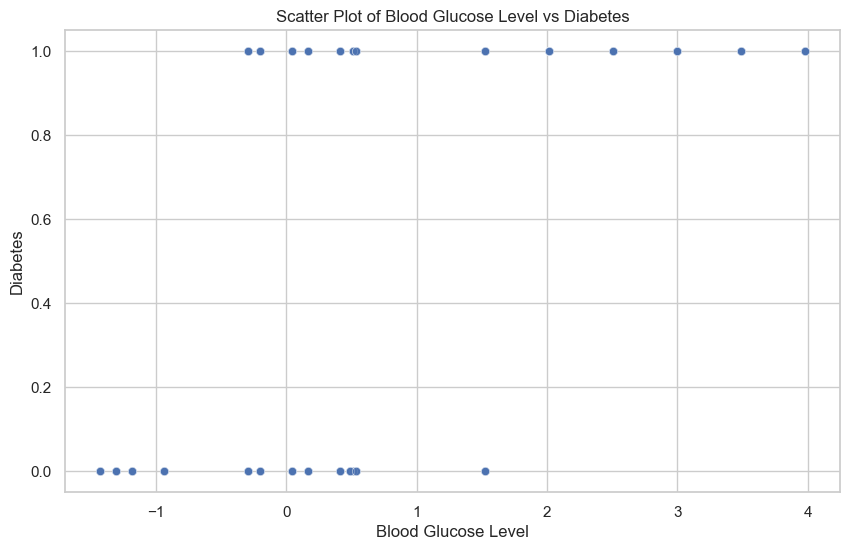

Optimization terminated successfully.
         Current function value: 0.214452
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                99982
Model:                          Logit   Df Residuals:                    99980
Method:                           MLE   Df Model:                            1
Date:                Wed, 18 Dec 2024   Pseudo R-squ.:                  0.2627
Time:                        07:04:33   Log-Likelihood:                -21441.
converged:                       True   LL-Null:                       -29080.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.0833      0.017   -179.397      0.000      -3.117      -3.050
bl

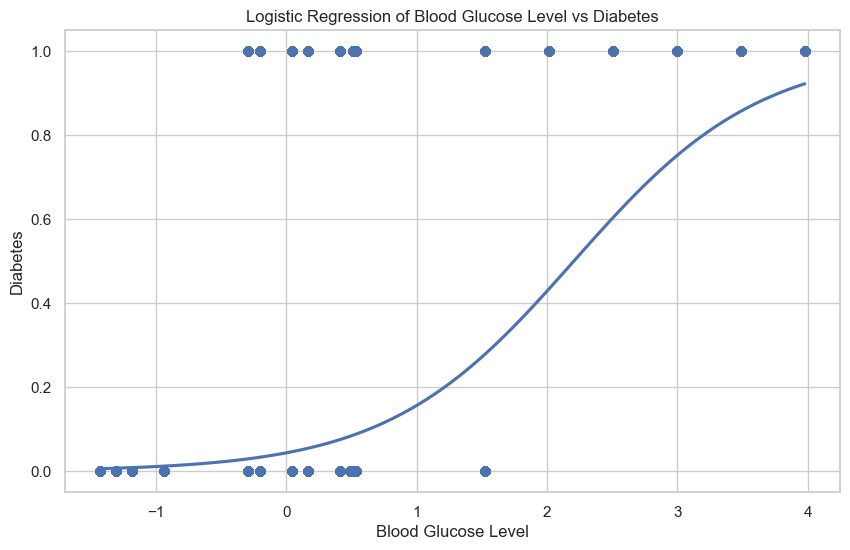

In [9]:
# Hypothesis Testing: Blood Glucose Level vs Diabetes

# Scatter plot to visualize the relationship between blood glucose level and diabetes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='blood_glucose_level', y='diabetes', data=data, alpha=0.5)
plt.title('Scatter Plot of Blood Glucose Level vs Diabetes')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes')
plt.show()

# Regression analysis to test the relationship between blood glucose level and diabetes
# Define the independent variable (blood glucose level) and dependent variable (diabetes)
X = data['blood_glucose_level']
y = data['diabetes']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.Logit(y, X)
result = model.fit()

# Print the summary of the regression analysis
print(result.summary())

# Plot the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='blood_glucose_level', y='diabetes', data=data, logistic=True, ci=None)
plt.title('Logistic Regression of Blood Glucose Level vs Diabetes')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Diabetes')
plt.show()

# Conclusion
Summarize the findings and discuss the implications of the results.

In [10]:
# Conclusion

# Summarize the findings and discuss the implications of the results
from IPython.display import display, Markdown

conclusion_text = """
### Conclusion

Based on the analysis and hypothesis testing conducted in this notebook, we can summarize the findings as follows:

1. **BMI vs Diabetes**:
   - The scatter plot and logistic regression analysis indicate a positive relationship between BMI and the probability of developing diabetes.
   - Higher BMI values are associated with an increased likelihood of diabetes.

2. **HbA1c Level vs Diabetes**:
   - The scatter plot and logistic regression analysis show a strong positive relationship between HbA1c levels and the probability of developing diabetes.
   - Elevated HbA1c levels significantly increase the risk of diabetes.

3. **Blood Glucose Level vs Diabetes**:
   - The scatter plot and logistic regression analysis reveal a positive relationship between blood glucose levels and the probability of developing diabetes.
   - Higher blood glucose levels are associated with a higher probability of diabetes.

### Implications

The findings from this analysis suggest that BMI, HbA1c levels, and blood glucose levels are important indicators of diabetes risk. Monitoring and managing these factors can be crucial in preventing and controlling diabetes. Healthcare professionals should consider these variables when assessing patients' risk for diabetes and developing intervention strategies.

Further research could explore additional factors and interactions between variables to gain a more comprehensive understanding of diabetes risk factors.
"""

display(Markdown(conclusion_text))


### Conclusion

Based on the analysis and hypothesis testing conducted in this notebook, we can summarize the findings as follows:

1. **BMI vs Diabetes**:
   - The scatter plot and logistic regression analysis indicate a positive relationship between BMI and the probability of developing diabetes.
   - Higher BMI values are associated with an increased likelihood of diabetes.

2. **HbA1c Level vs Diabetes**:
   - The scatter plot and logistic regression analysis show a strong positive relationship between HbA1c levels and the probability of developing diabetes.
   - Elevated HbA1c levels significantly increase the risk of diabetes.

3. **Blood Glucose Level vs Diabetes**:
   - The scatter plot and logistic regression analysis reveal a positive relationship between blood glucose levels and the probability of developing diabetes.
   - Higher blood glucose levels are associated with a higher probability of diabetes.

### Implications

The findings from this analysis suggest that BMI, HbA1c levels, and blood glucose levels are important indicators of diabetes risk. Monitoring and managing these factors can be crucial in preventing and controlling diabetes. Healthcare professionals should consider these variables when assessing patients' risk for diabetes and developing intervention strategies.

Further research could explore additional factors and interactions between variables to gain a more comprehensive understanding of diabetes risk factors.
